## Simulate the sandpile model with 2 random neighbours

In [379]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Plot settings
# plt.rc('font', family='serif')
# plt.rc('text', usetex=True)
# plt.rc('axes', axisbelow=True)

Define the sandpile model below

In [750]:
def sandpile_model(initial_state, max_value=1, yield_all=False, grain_add_method='random', measure_extension=True):
    nx, ny = initial_state.shape
    state = initial_state.copy()

    # execute topplings (if any)
    while True:
        
        # Initialize placeholder for avalanche size
        avalanche_size = 0
        
        ###################################################
        # Initialize matrix to measure extend of avalanches
        if measure_extension == True:
            mat = np.zeros(initial_state.shape)
        ###################################################
        
        while True:
            
            # create a zero-padded copy of state so we don't
            # need to worry about the edges
            state_padded = np.pad(state, 1, 'constant', constant_values=0)

            # Chech if excited sites are present
            is_above_threshold = state_padded > max_value

            if not np.any(is_above_threshold):
                break

            # Find the excited site(s)
            i, j = np.where(is_above_threshold)
            
            # Remove grains from the excited site
            state_padded[i, j] -= 2
            
            # Assing sand randomly twice
            for _ in range(2):
                
                # Determine whether to move vertically or horizontally
                ver_ho = np.random.randint(0,2)
                
                # Determine the direction to move
                direction = 2*np.random.randint(0,2) - 1
                
                # Vertically
                if ver_ho == 0:
                    state_padded[i, j + direction] += 1
                    
                # Horizontally
                elif ver_ho == 1:
                    state_padded[i + direction, j] += 1

            # Add avalance number
            avalanche_size += np.count_nonzero(is_above_threshold)
            
            ###################################
            # Measure the extend of avalanches
            if measure_extension == True:
                mat += is_above_threshold[1:-1,1:-1]
            ###################################
            
            # Remove padding
            state = state_padded[1:-1, 1:-1]
            
            if yield_all:
                yield state, None
        
        ####################
        # Compute extend of avalanches
        if measure_extension == True:
            
            # Return booleran of toppeled sites
            mask = np.all(mat == 0, axis=1)
            mat = mat[~mask, :]
            mat = mat[:, ~mask] 
            shape = np.shape(mat)
            extend = np.amax(shape)
        ####################

        # Add grains at random sites
        if grain_add_method == 'random':
            i, j = np.random.randint(nx), np.random.randint(ny)
        
        # Only add grains at the edge of the system
        elif grain_add_method == 'edge':
            
            ver_ho2 = np.random.randint(0,2)
            
            # Vertical
            if ver_ho2 == 0:
                
                # Either on the left or right
                j = nx*np.random.randint(0,2) - 1
                
                # Row number
                i = np.random.randint(nx)
                
            # Horizontal
            elif ver_ho2 == 1:
                
                # Either at the top or bottom
                i = ny*np.random.randint(0,2) - 1
                
                # Column number
                j = np.random.randint(ny)
            
        state[i, j] += 1
        
        yield state, avalanche_size, extend

### Q1

*Implement the sandpile model on an $25 \times 25$ lattice and plot avalanche size as a function of time*

Run the system and record avalanche sizes

In [754]:
# Initialize an empty lattice
initial_state = np.zeros((25, 25), dtype=int)
state_generator = sandpile_model(initial_state, grain_add_method = 'random')

# Keep track of avalanche sizes
iterations = 5000
avalanches = []
av_grains = []

for state, avalanche_size, extend in state_generator:
#     if avalanche_size > 0:
    avalanches.append(avalanche_size)
    av_grains.append(np.average(state))

    if len(avalanches) > iterations-1:
        break

Plot the resulting time series of avalanche sizes

In [755]:
# Define x values for the plot
x_vals = range(iterations)

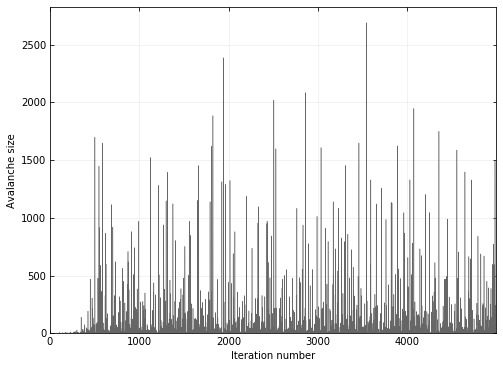

In [756]:
# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_vals, avalanches, color = '0.4', linewidth = 0.5)

# Plot setting
ax.set_xlabel('Iteration number')
ax.set_ylabel('Avalanche size')
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../midterm_2/avalanches.pdf')

Compute the average number of sand grains per site

In [758]:
print('The average number of sand grains per site is ' + str(np.average(state)))

The average number of sand grains per site is 0.6608


Could make a time series of the average number of grains as a function of time, to show steady state

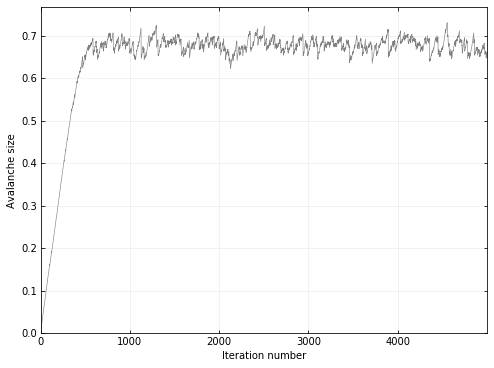

In [759]:
# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_vals, av_grains, color = '0.5', linewidth = 0.6)

# Plot setting
ax.set_xlabel('Iteration number')
ax.set_ylabel('Avalanche size')
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(0)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../midterm_2/av_grains.pdf')

## Q.2

*Simulate the system for various sizes. Compute the steady state avalanche distribution for each system size and estimate the associated exponent*

In [71]:
# Initialize
sys_size = [25, 50, 100, 200]
iterations = 20000
n0 = 15000
avalanche_mat = np.zeros((len(sys_size), iterations - 15000)) # Rows correspond to system sizes, columns are avalance sizes after transient phase 
av_grain_mat = np.zeros(len(sys_size), iteration) # Keep track of average number of grains to find steady state

# Loop over system sizes
for i,L in enumerate(sys_size):

    # Initialize an empty lattice at given size
    initial_state = np.zeros((L, L), dtype=int)
    state_generator = sandpile_model(initial_state, grain_add_method = 'random')

    # Keep track of avalanche sizes
    avalanches = []
    av_grain = []

    for state, avalanche_size in state_generator:
        if avalanche_size > 0:
            avalanches.append(avalanche_size)
            av_grain.append(np.average(state))

        if len(avalanches) > iterations-1:
            break

    # Add avalanche distribution and grain number
    avalanche_mat[i,:] = avalanches[n0 : iterations]
    av_grain_mat[i,:] = av_grain[:]

Compute the distribution of avalanches 

In [207]:
# Generate bins
bin_nr = 30
bins = np.logspace(0,7,bin_nr)

# Initialize density matrix
density = np.zeros((len(avalanche_mat), bin_nr - 1))
s_vals = np.zeros(bin_nr - 1)

# Loop over system size
for i in range(len(avalanche_mat)):
    
    # Loop over bin values
    for j in range(bin_nr - 1):
    
        # Count occurences
        bol = (avalanche_mat[i,:] >= bins[j]) & (avalanche_mat[i,:] < bins[j+1])
        num = bol.sum()
        
        # Divide by bin length to generate density
        den = num / ((bins[j+1] - bins[j]) * len(avalanche_mat[i,:]))
        density[i,j] = den
        
        # Compte associated avalanche size as the mid point of each bin
        s_vals[j] = (bins[j] + bins[j+1]) / 2

Plot the resulting distribution in a log-log plot

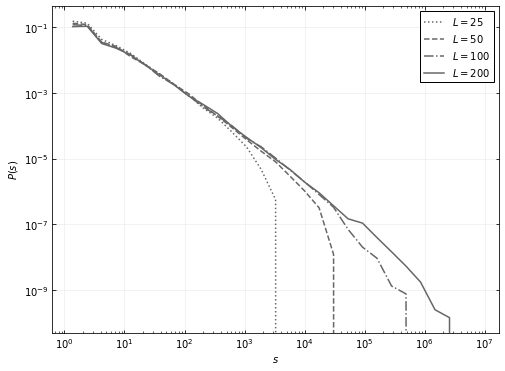

In [791]:
# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot distributions
col = '0.4'
ax.plot(s_vals, density[0,:], color = col, linestyle = ':', label = r'$L = 25$')
ax.plot(s_vals, density[1,:], color = col, linestyle = '--', label = r'$L = 50$')
ax.plot(s_vals, density[2,:], color = col, linestyle = '-.', label = r'$L = 100$')
ax.plot(s_vals, density[3,:], color = col, linestyle = '-', label = r'$L = 200$')

# Settings
ax.set(xscale='log',yscale='log')

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$P(s)$')

ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

plt.savefig('../../midterm_2/avalanche_distribution.pdf')

Estimate exponent and dimension from data collapse technique

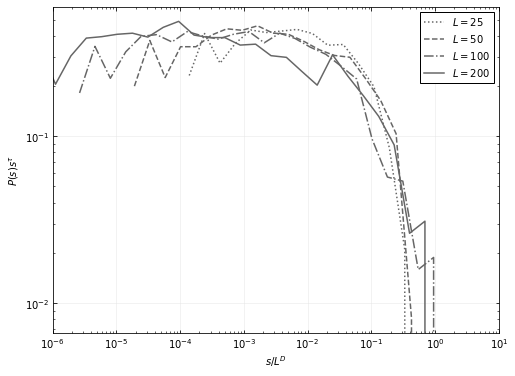

In [816]:
tau = 1.3
D = 2/(2 - tau)

# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

col = '0.4'
ax.plot(s_vals/(25**D), density[0,]*s_vals**expo, color = col, linestyle = ':', label = r'$L = 25$')
ax.plot(s_vals/(50**D), density[1,:]*s_vals**expo, color = col, linestyle = '--', label = r'$L = 50$')
ax.plot(s_vals/(100**D), density[2,:]*s_vals**expo, color = col, linestyle = '-.', label = r'$L = 100$')
ax.plot(s_vals/(200**D), density[3,:]*s_vals**expo, color = col, label = r'$L = 200$')

ax.set_xlabel(r'$s /L^D$')
ax.set_ylabel(r'$P(s) s^{\tau}$')

ax.set(xscale='log',yscale='log')
ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

ax.set_xlim(10e-7,10e+0)
    
plt.savefig('../../midterm_2/avalanche_distribution_normalized.pdf')

## Q.3 ##

*Something*

Run system again and save the linear extend of avalanches

In [606]:
# Initialize an empty lattice
initial_state = np.zeros((200, 200), dtype=int)
state_generator = sandpile_model(initial_state, grain_add_method = 'random', measure_extension = True)

# Keep track of avalanche sizes
iterations = 20000
avalanches = []
avalanche_extend = []

for state, avalanche_size, extend in state_generator:
    if avalanche_size > 0:
        avalanches.append(avalanche_size)
        av_grains.append(np.average(state))
        avalanche_extend.append(extend)

    if len(avalanches) > iterations-1:
        break

Compute fit by OLS

In [678]:
log_extend = np.log(np.asarray(avalanche_extend[15000:])) # Remove the first 15000 avalanches 
log_size = np.log(np.asarray(avalanches[15000:]))

# Remove small observations
mask = np.where(log_extend < 2)
log_extend = np.delete(log_extend, mask)
log_size = np.delete(log_size, mask)

In [686]:
alpha_1 = np.cov(log_size, log_extend)[1,0] / np.var(log_extend)
alpha_0 = np.mean(log_size - alpha_1*log_extend)
fitted = alpha_0 + alpha_1*log_extend

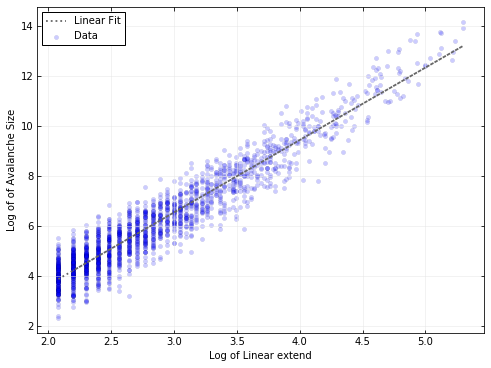

In [761]:
# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(log_extend, log_size, color = 'blue', s = 20, alpha = 0.2, edgecolor = 'k', linewidth= 0.2, label = 'Data')
ax.plot(log_extend, fitted, linewidth = 1.8, color = '0.4', linestyle = ':', label = 'Linear Fit')

ax.set_xlabel('Log of Linear extend')
ax.set_ylabel('Log of of Avalanche Size')

ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

plt.savefig('../../midterm_2/linear_fit.pdf')

In [748]:
print(alpha_1)

2.8999523387363912


## Q.4 ##

*Simulate the system where grains are only added at the edges*

In [776]:
# Initialize an empty lattice
initial_state = np.zeros((25, 25), dtype=int)
state_generator = sandpile_model(initial_state, grain_add_method = 'edge')

# Keep track of avalanche sizes
iterations = 40000
avalanches_edge = []
av_grains_edge = []

for state, avalanche_size, extend in state_generator:
    avalanches_edge.append(avalanche_size)
    av_grains_edge.append(np.average(state))

    if len(avalanches_edge) > iterations-1:
        break

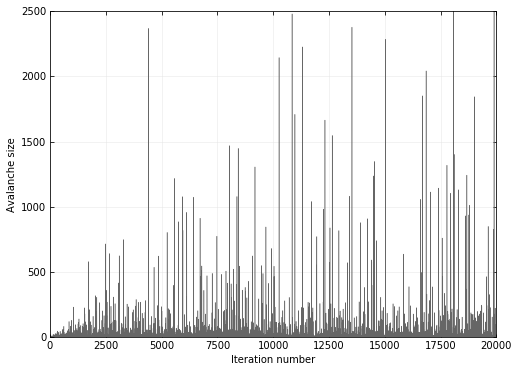

In [817]:
x_vals_edge = range(0,iterations)

# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_vals_edge, avalanches_edge, color = '0.4', linewidth = 0.5)

# Plot setting
ax.set_xlabel('Iteration number')
ax.set_ylabel('Avalanche size')
ax.set_xlim(x_vals_edge[0], 20000)
ax.set_ylim(0,2500)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../midterm_2/avalanches_edge.pdf')

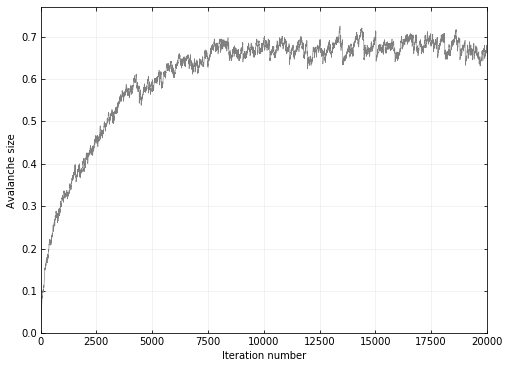

In [784]:
# plt.plot(av_grains_edge)

# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot the avalanche sizes
ax.plot(x_vals_edge, av_grains_edge, color = '0.5', linewidth = 0.6)

# Plot setting
ax.set_xlabel('Iteration number')
ax.set_ylabel('Avalanche size')
ax.set_xlim(x_vals_edge[0], 20000)
ax.set_ylim(0)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both',bottom=True,top=True,left=True,right=True,direction='in',which='both')

plt.savefig('../../midterm_2/av_grains_edge.pdf')

In [785]:
bins_edge = np.logspace(0,7,bin_nr)
avalanches_edge_ss = avalanches_edge[10000:] # Remove the first 10000 observations

# Initialize density matrix
density_edge = np.zeros(bin_nr - 1)
s_vals_edge = np.zeros(bin_nr - 1)

# Loop over bin values
for j in range(bin_nr - 1):

    # Count occurences
    bol = (avalanches_edge_ss >= bins_edge[j]) & (avalanches_edge_ss < bins_edge[j+1])
    num = bol.sum()

    # Divide by bin length to generate density
    den = num / ((bins_edge[j+1] - bins_edge[j]) * len(avalanches_edge_ss))
    density_edge[j] = den

    # Compte associated avalanche size as the mid point of each bin
    s_vals_edge[j] = (bins_edge[j] + bins_edge[j+1]) / 2

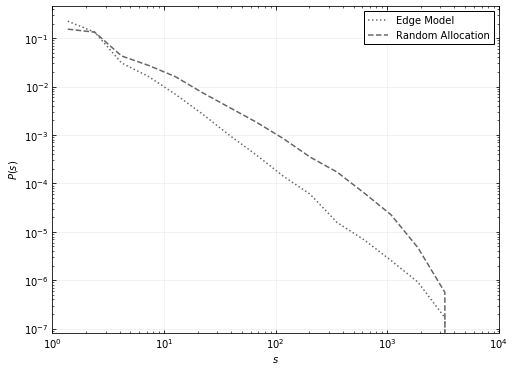

In [798]:
# Initialize the figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

# Plot distributions
col = '0.4'
ax.plot(s_vals_edge, density_edge, color = col, linestyle = ':', label = 'Edge Model')
ax.plot(s_vals_edge, density[0,:], color = col, linestyle = '--', label = 'Random Allocation')

# Settings
ax.set(xscale='log',yscale='log')
ax.set_xlim(1,1e+4)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$P(s)$')

ax.legend(frameon = True, edgecolor = 'k', facecolor = 'white', framealpha=1, fancybox=False)
ax.grid(b=True, which = 'major', linestyle='-', linewidth=0.5, color='0.9')
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='both')

plt.savefig('../../midterm_2/avalanche_distribution_edge.pdf')

Estimate the exponent of the distribution. Use the interval $s \in [10,10^3]$

In [846]:
# Remove small and large observations
mask1 = np.where(s_vals_edge > 1e+3) 
mask2 = np.where(s_vals_edge < 10)

x = np.delete(s_vals_edge, mask1)
x = np.delete(x, mask2)

y = np.delete(density_edge, mask1)
y = np.delete(y, mask2)

# Compute tau by OLS
tau_edge = -np.polyfit(np.log(x),np.log(y),1)
print(tau_edge[0])

1.7918171431078114
